In [46]:
!pip install numpy

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
train_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\PlantDDA\\train'  # Replace with your training dataset directory
val_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\PlantDDA\\train'  # Replace with your validation dataset directory

In [59]:
IMAGE_SIZE = 128
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 10  # Increase for better results if your dataset allows it
n_classes = 3  # Replace with the number of classes in your dataset

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5548 images belonging to 3 classes.
Found 5548 images belonging to 3 classes.


In [65]:
from tensorflow.keras import models, layers

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # Remove one or two more layers as needed
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 88s 487ms/step - accuracy: 0.6445 - loss: 0.7644 - val_accuracy: 0.7403 - val_loss: 0.5898
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 84s 486ms/step - accuracy: 0.9059 - loss: 0.2426 - val_accuracy: 0.8068 - val_loss: 0.5816
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 86s 494ms/step - accuracy: 0.9517 - loss: 0.1281 - val_accuracy: 0.9573 - val_loss: 0.1136
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 87s 499ms/step - accuracy: 0.9599 - loss: 0.1112 - val_accuracy: 0.8998 - val_loss: 0.2802
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 85s 489ms/step - accuracy: 0.9565 - loss: 0.1087 - val_accuracy: 0.9719 - val_loss: 0.0812
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 85s 491ms/step - accuracy: 0.9616 - loss: 0.0963 - val_accuracy: 0.9618 - val_loss: 0.1110
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 84s 482ms/step - accuracy: 0.9750 - loss: 0.0693 - val_accuracy: 0.9530 - val_loss: 0.1325
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 82s 474ms/step - accuracy: 0.9789 - loss: 0

In [73]:
model.save('plant_recognition_model.keras')

In [75]:
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

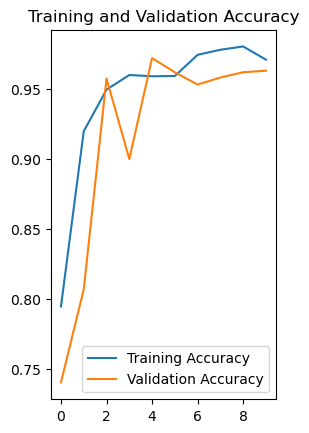

In [77]:
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

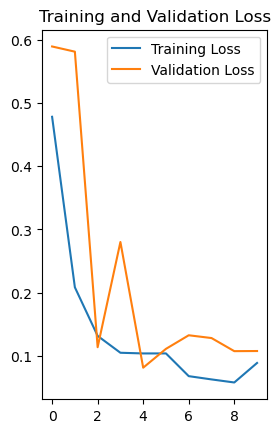

In [79]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

174/174 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9634 - loss: 0.1084
Validation Accuracy: 0.96


In [83]:
def load_and_prepare_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch dimension
    img_array /= 255.0  # Normalize to match training
    return img_array

In [97]:
test_image_path = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\test_images_from_internet\\tom_tom.jpg'  # Replace with the path of a test leaf image
prepared_image = load_and_prepare_image(test_image_path)

In [99]:
prediction = model.predict(prepared_image)
predicted_class = np.argmax(prediction, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


In [100]:
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

Predicted Class: Tomato___healthy
